Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [3]:
# loading the data to a pandas framework
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
# printing first 5 rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# printing last 5 rows of the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# printing dimensions of the dataset
gold_data.shape

(2290, 6)

In [7]:
# getting some info about the dataset
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between two Variables in a dataset:
1. Postive Correlation : Direct proportionality
2. Negative Correlation : Inverse Proportionality

In [10]:
correlation = gold_data.corr()

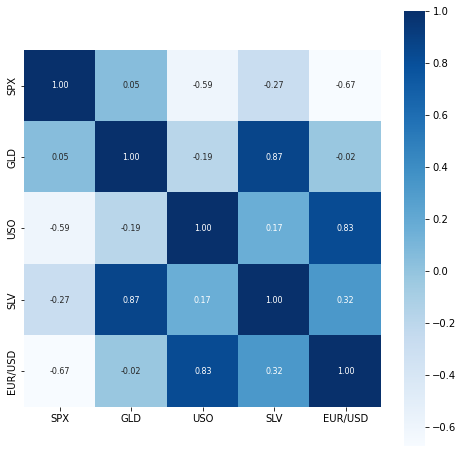

In [11]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.2f',annot=True, annot_kws={'size':8},cmap = 'Blues')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


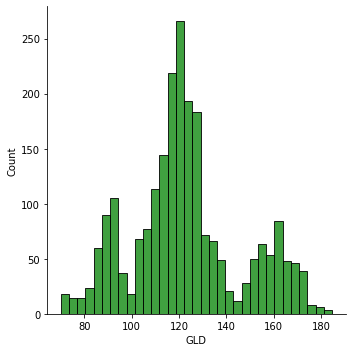

In [14]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color= 'green')

Splitting the features and the target

In [16]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [17]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

Model Training : Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [27]:
print(test_data_prediction)

[168.50249911  81.95599989 116.00600007 127.65830104 120.68920154
 154.62609817 150.60259868 126.09020064 117.34619887 126.02810062
 116.45390102 171.94270052 140.90479762 167.87349922 115.14300011
 117.6529004  140.70200302 169.83910082 159.01440341 160.03579933
 155.18130031 125.47430052 176.13659986 157.39970368 125.24610049
  93.90079959  77.69180044 120.70970024 119.19609966 167.51239916
  88.23400069 125.40080007  91.17490074 117.70409993 121.17979905
 136.61090091 115.2662012  115.09760097 149.82950027 107.37820083
 104.17200244  87.2769978  126.49430073 117.94310019 152.38009892
 119.5796002  108.4695999  108.14479848  93.18220079 127.20429753
  75.2011004  113.70079946 121.1542999  111.27119913 118.80339878
 120.95369946 159.25940087 166.26150086 147.07149688  85.99569871
  94.28060052  86.83679863  90.54520008 119.00170068 126.41020057
 127.52200039 169.40020012 122.17289949 117.28539895  98.32960013
 167.32940128 142.97199884 132.2098023  121.18750235 121.73159943
 119.49480

In [28]:
# R Squared Data
error_score = metrics.r2_score(y_test,test_data_prediction)

In [30]:
print('R Squared Error: ', error_score)

R Squared Error:  0.989604606860652


Comparing The Actual Values and the Predicted values in a plot

In [31]:
y_test = list(y_test)

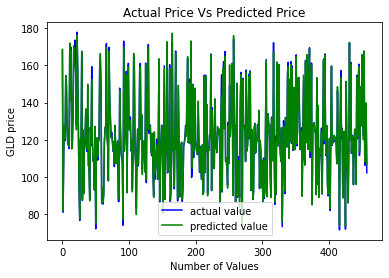

In [32]:
plt.plot(y_test, color = 'blue', label = 'actual value')
plt.plot(test_data_prediction, color = 'green', label = 'predicted value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()